### **What is `scipy.integrate`?**

In simple words, integration is like calculating the area under a curve, right? Matlab: If you have a function, and you want to find out the total area from one point to another on its curve, you integrate that function.

Now, in **SciPy**, we have a module called **`integrate`**, which is *very* useful for solving both simple and complex integration problems. Whether it's single-variable integrals, multi-variable integrals, or solving differential equations—this is the toolkit you need!

### **Basic Integration using `quad()`**

Let’s start with a simple problem. Suppose you have a function `f(x) = x^2`, and you want to integrate this function between limits, say from 0 to 2. Now, we can use **`quad()`**, which is like a shortcut for **Quadrature**, an integration technique.

In [1]:
import scipy.integrate as integrate

# Define the function
def f(x):
    return x**2

# Perform the integration
result, error = integrate.quad(f, 0, 2)

print("Result of the integration:", result)
print("Estimated error:", error)

Result of the integration: 2.666666666666667
Estimated error: 2.960594732333751e-14


- `quad()` returns two values: the integral result and the error estimate.
- It integrates `f(x)` from `0` to `2`.

**Explanation**: Just like in your school where you learned to find the area of rectangles and sum them up to approximate the area under a curve, here SciPy does it smartly for us. The result will be the exact area!

### **Double Integration using `dblquad()`**

Now suppose you need to calculate a double integral. Don’t worry! You don’t have to do everything by hand—SciPy has your back with **`dblquad()`**. It’s for *two-variable* functions.

Let’s say you want to integrate `f(x, y) = x * y` over the ranges `x: [0, 1]` and `y: [0, 1]`.

In [2]:
def f(x, y):
    return x * y

result, error = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1)

print("Result of the double integration:", result)
print("Estimated error:", error)

Result of the double integration: 0.24999999999999997
Estimated error: 5.539061329123429e-15


- The function `f(x, y)` is integrated over the region where `x` ranges from `0` to `1`, and for each value of `x`, `y` ranges from `0` to `1`.
- We use **lambda functions** here to specify the limits for `y` which depend on `x`.

### **Triple Integration using `tplquad()`**

We can go even further, like into three dimensions, using **`tplquad()`**. For instance, if you have a function of three variables, `f(x, y, z)`, and you want to compute the volume under it, here’s how you do it.

**Example**: For `f(x, y, z) = x * y * z` with `x: [0, 1]`, `y: [0, 1]`, and `z: [0, 1]`.

In [3]:
def f(x, y, z):
    return x * y * z

result, error = integrate.tplquad(f, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

print("Result of the triple integration:", result)
print("Estimated error:", error)

Result of the triple integration: 0.12499999999999999
Estimated error: 5.527033708952211e-15


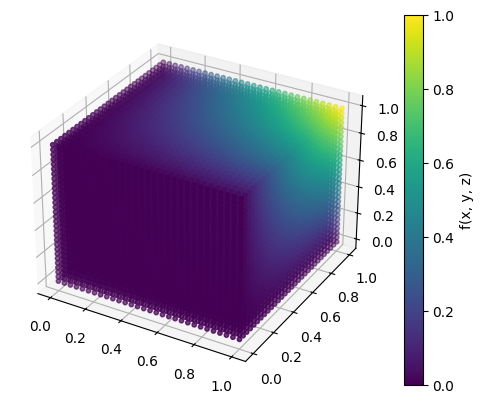

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X, Y, Z = np.meshgrid(np.linspace(0, 1, 30), np.linspace(0, 1, 30), np.linspace(0, 1, 30))
F_values = X * Y * Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X, Y, Z, c=F_values, cmap='viridis', s=10)
fig.colorbar(scat, label='f(x, y, z)')
plt.show()

calculating the volume under a 3D surface!

### **Solving Ordinary Differential Equations (ODEs) with `solve_ivp()`**

One of the most *powerful* uses of `scipy.integrate` is for solving differential equations. If you have a system where the change in one variable depends on the change in another (that’s basically a differential equation), you can use **`solve_ivp()`**.

Imagine you have an equation like:

\[
\frac{dy}{dx} = -2y
\]

We want to solve this differential equation starting at `x = 0` and ending at `x = 5`, with an initial condition that `y(0) = 1`.

In [6]:
import numpy as np

# Define the differential equation as a function
def dydx(x, y):
    return -2 * y

# Define the time points where we want the solution
x_vals = np.linspace(0, 5, 100)

# Solve the equation using solve_ivp
solution = integrate.solve_ivp(dydx, [0, 5], [1], t_eval=x_vals)
x = solution.t
y = solution.y[0]
print("Solution values for y:", y)

Solution values for y: [1.00000000e+00 9.03923887e-01 8.17053791e-01 7.38413129e-01
 6.67297051e-01 6.03060501e-01 5.45085645e-01 4.92781868e-01
 4.45585776e-01 4.02961195e-01 3.64399172e-01 3.29425220e-01
 2.97736577e-01 2.69079320e-01 2.43189588e-01 2.19816052e-01
 1.98719907e-01 1.79674881e-01 1.62467225e-01 1.46895723e-01
 1.32780882e-01 1.20003932e-01 1.08453316e-01 9.80209711e-02
 8.86040063e-02 8.01047008e-02 7.24305047e-02 6.54940384e-02
 5.92130933e-02 5.35199888e-02 4.83690166e-02 4.37138378e-02
 3.95102248e-02 3.57160940e-02 3.22915055e-02 2.91986632e-02
 2.64019148e-02 2.38679096e-02 2.15721470e-02 1.94957265e-02
 1.76196766e-02 1.59259115e-02 1.43972308e-02 1.30173199e-02
 1.17707493e-02 1.06429754e-02 9.62071431e-03 8.69503304e-03
 7.85804465e-03 7.10200323e-03 6.41952570e-03 5.80359186e-03
 5.24754432e-03 4.74508859e-03 4.29029297e-03 3.87796247e-03
 3.50473220e-03 3.16734084e-03 2.86263967e-03 2.58762584e-03
 2.33944232e-03 2.11537794e-03 1.91286737e-03 1.72949112e-03
 

- `solve_ivp()` is the *integrator* that handles the differential equation.
- We define `dydx()` to represent the equation.
- `x_vals` is the array of points where we want the solution.
- Initial condition: `y(0) = 1`.
- `solution.y[0]` gives us the actual solution values for `y`.

### **Multiple Integration using `nquad()`**

Finally, if you have really **complex, multi-variable integrals**, then **`nquad()`** is your friend. It allows you to compute n-dimensional integrals.

Let’s take an example where we integrate `f(x, y, z) = x * y * z` with certain ranges for each variable. This can be done like this:

In [7]:
def integrand(x, y, z):
    return x * y * z

limits = [[0, 1], [0, 1], [0, 1]]

result, error = integrate.nquad(integrand, limits)

print("Result of multiple integration:", result)
print("Estimated error:", error)

Result of multiple integration: 0.12499999999999999
Estimated error: 5.527033708952211e-15


nquad() can handle more than three dimensions! You provide it the function and the limits for each variable.

### **1. What is a Differential Equation?**

In simple terms, a differential equation is like saying: “If I know how something is changing, can I figure out what it actually is?”

For example, if I know how fast the population is growing (the rate of change of the population), can I figure out how big the population will be after some time?

In mathematical terms, a **differential equation** is an equation that relates a function \( y(x) \) with its derivative \( \frac{dy}{dx} \). For example:

\[
\frac{dy}{dx} = -2y
\]

This is saying that the rate of change of \( y \) with respect to \( x \) is proportional to \( -2y \). Our job is to solve for \( y(x) \).

### **What is `solve_ivp()`?**

**`solve_ivp()`** is a powerful function in SciPy that helps us **solve Initial Value Problems (IVPs)**. An IVP is when you know the starting point of your solution (initial value) and want to find how it behaves over time.

Imagine you drop a stone from a height. The stone’s initial position and velocity are known at time \( t = 0 \). Using this, you can predict its position at any later time!

### **Example: Simple Differential Equation**

Let’s take our simple differential equation from above:

$dxdy​=−2y$

This equation represents **exponential decay**, where the rate at which \( y \) decreases depends on its current value.

We want to solve this equation, starting with an initial condition \( y(0) = 1 \), for the range \( x = 0 \) to \( x = 5 \).

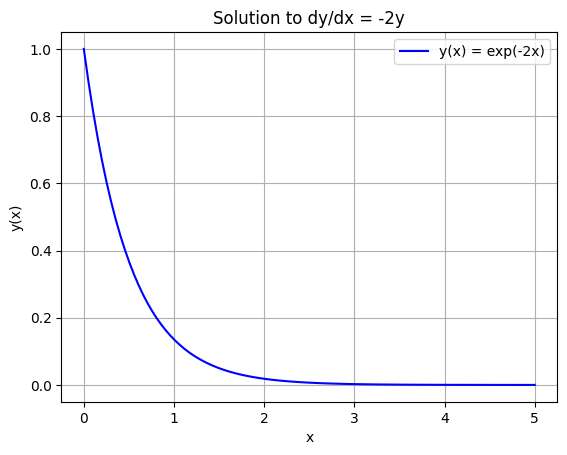

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation: dy/dx = -2y
def dydx(x, y):
    return -2 * y

# Define the range of x values and the initial condition y(0) = 1
x_vals = np.linspace(0, 5, 100)
initial_y = [1]
solution = solve_ivp(dydx, [0, 5], initial_y, t_eval=x_vals)
plt.plot(solution.t, solution.y[0], label="y(x) = exp(-2x)", color="b")
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution to dy/dx = -2y')
plt.legend()
plt.grid(True)
plt.show()

- **`dydx()`**: This function defines the equation \( \frac{dy}{dx} = -2y \). Every time SciPy calls it, it computes the rate of change of \( y \) for a given \( x \).
- **Initial Condition**: We tell `solve_ivp()` that at \( x = 0 \), \( y = 1 \).
- **`t_eval`**: This tells `solve_ivp()` at what points in the range \( x \) we want the solution.

### **What does the output show?**

The output graph shows **exponential decay** of \( y(x) \) as \( x \) increases. The function \( y(x) \) decreases rapidly because of the negative rate of change, following the equation \( y(x) = e^{-2x} \).

### **Systems of Differential Equations**

Now, let’s make things more interesting! What if you have multiple variables that depend on each other?

For example, consider two variables \( y_1(x) \) and \( y_2(x) \), related by two differential equations:

\[
\frac{dy_1}{dx} = -2y_1 + y_2
\]
\[
\frac{dy_2}{dx} = -y_1
\]

We need to solve these two equations together, starting with initial conditions \( y_1(0) = 1 \) and \( y_2(0) = 0 \).

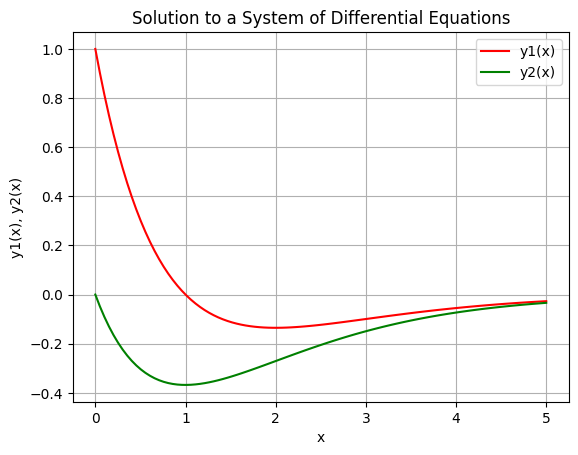

In [9]:
# Define the system of differential equations
def system_of_eqns(x, y):
    y1, y2 = y
    dydx1 = -2 * y1 + y2
    dydx2 = -y1
    return [dydx1, dydx2]

# Initial conditions and range of x values
initial_conditions = [1, 0]
x_vals = np.linspace(0, 5, 100)

# Solve the system of equations
solution = solve_ivp(system_of_eqns, [0, 5], initial_conditions, t_eval=x_vals)
plt.plot(solution.t, solution.y[0], label='y1(x)', color='r')
plt.plot(solution.t, solution.y[1], label='y2(x)', color='g')
plt.xlabel('x')
plt.ylabel('y1(x), y2(x)')
plt.title('Solution to a System of Differential Equations')
plt.legend()
plt.grid(True)
plt.show()

- **`system_of_eqns()`**: Defines the system of two equations.
- **Initial Conditions**: We specify the starting values \( y_1(0) = 1 \) and \( y_2(0) = 0 \).
- The solution gives us both \( y_1(x) \) and \( y_2(x) \) over the range \( x = 0 \) to \( x = 5 \), which we then plot.

### **What does the output show?**

The graph shows how both \( y_1(x) \) and \( y_2(x) \) evolve with \( x \). These types of systems appear everywhere, like in physics when modeling coupled oscillations or even in predator-prey models in ecology!

### **Real-World Application: Predator-Prey Model (Lotka-Volterra)**

A famous example of a system of differential equations is the **predator-prey model**, which describes the interaction between two species: a prey (say rabbits) and a predator (say foxes).

The equations are:

\[
\frac{dx}{dt} = \alpha x - \beta x y
\]
\[
\frac{dy}{dt} = \delta x y - \gamma y
\]

Where:

- \( x(t) \) is the prey population (rabbits).
- \( y(t) \) is the predator population (foxes).
- \( \alpha, \beta, \delta, \gamma \) are constants.

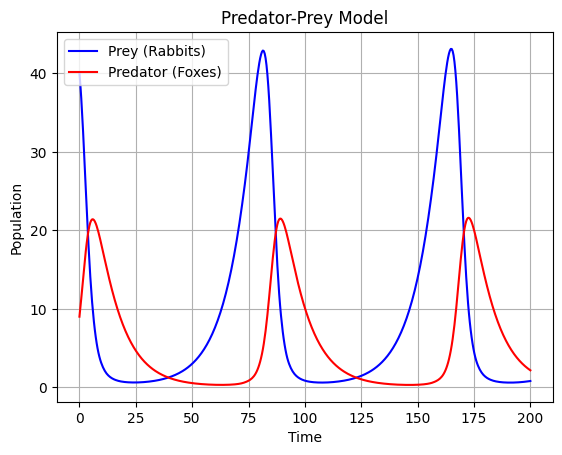

In [10]:
def predator_prey(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Constants for the model
alpha = 0.1  # Prey birth rate
beta = 0.02  # Predator hunting efficiency
delta = 0.01 # Predator reproduction rate
gamma = 0.1  # Predator death rate

# Initial populations (rabbits, foxes)
initial_pop = [40, 9]
t_vals = np.linspace(0, 200, 500)
solution = solve_ivp(predator_prey, [0, 200], initial_pop, t_eval=t_vals, args=(alpha, beta, delta, gamma))

# Plotting the populations over time
plt.plot(solution.t, solution.y[0], label='Prey (Rabbits)', color='b')
plt.plot(solution.t, solution.y[1], label='Predator (Foxes)', color='r')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

- **Prey (rabbits)**: Increase in population due to birth (\( \alpha x \)) but decreases due to predation (\( \beta x y \)).
- **Predators (foxes)**: Increase due to predation (\( \delta x y \)) but decreases due to natural death (\( \gamma y \)).

The graph shows oscillations, meaning predator and prey populations rise and fall over time, a classic behavior seen in nature!

### **Exploring Different Integration Methods**

By default, `solve_ivp()` uses a numerical method called **Runge-Kutta** (specifically RK45). But depending on your problem, you might want to use different methods for better accuracy or speed.

### **Available Methods in `solve_ivp()`**:

- **RK45**: The default Runge-Kutta method (5th-order).
- **RK23**: Lower order Runge-Kutta method (useful for faster but less accurate results).
- **BDF**: Backward Differentiation Formula (good for stiff problems).
- **LSODA**: Automatically switches between stiff and non-stiff solvers, depending on the situation.

### **Code Example: Comparing Methods**

Let’s solve the same exponential decay equation with different solvers and compare the results.

$
\frac{dy}{dx} = -2y, \quad y(0) = 1$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dydx(x, y):
    return -2 * y

x_vals = np.linspace(0, 5, 100)
initial_y = [1]

In [3]:
# Solve using different methods
solution_rk45 = solve_ivp(dydx, [0, 5], initial_y, t_eval=x_vals, method='RK45')
solution_rk23 = solve_ivp(dydx, [0, 5], initial_y, t_eval=x_vals, method='RK23')
solution_bdf = solve_ivp(dydx, [0, 5], initial_y, t_eval=x_vals, method='BDF')
solution_lsoda = solve_ivp(dydx, [0, 5], initial_y, t_eval=x_vals, method='LSODA')

In [5]:
print(solution_rk45)
print(solution_rk23)
print(solution_bdf)
print(solution_lsoda)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 1.000e+00  9.039e-01 ...  5.058e-05  4.572e-05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 1.000e+00  9.039e-01 ...  4.660e-05  4.207e-05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 1.000e+00  9.046e-01 ...  5.065e-05  4.578e-05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 82
     njev: 1
      nlu: 11
  message: The solver successfully r

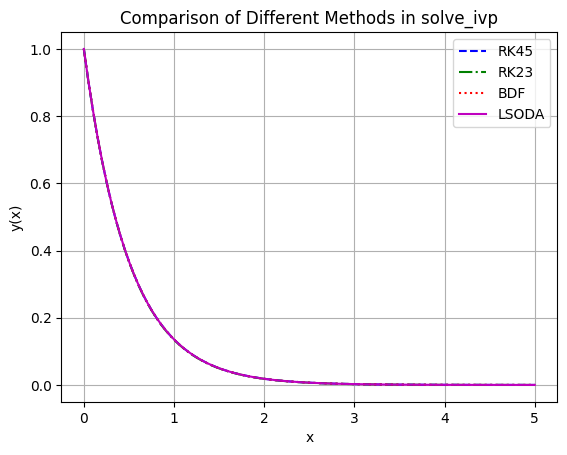

In [6]:
plt.plot(solution_rk45.t, solution_rk45.y[0], label='RK45', color='b', linestyle='--')
plt.plot(solution_rk23.t, solution_rk23.y[0], label='RK23', color='g', linestyle='-.')
plt.plot(solution_bdf.t, solution_bdf.y[0], label='BDF', color='r', linestyle=':')
plt.plot(solution_lsoda.t, solution_lsoda.y[0], label='LSODA', color='m', linestyle='-')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparison of Different Methods in solve_ivp')
plt.legend()
plt.grid(True)
plt.show()

- We solved the same problem with **four different methods**.
- The **plot** compares the results of each solver.

**Insight**: For simple problems like this, all methods will likely give the same result, but for more complex or **stiff** problems, choosing the right solver is key.

### **Handling Stiff Equations**

A **stiff equation** is one where certain terms can cause rapid changes in the solution. This leads to numerical instability if not handled properly.

### **Example: Stiff Equation**
$
\frac{dy}{dx} = -1000y + 3000 - 2000e^{-x}, \quad y(0) = 0
$
This is a stiff equation because of the large coefficient (-1000). Let's solve it using the **BDF** method, which is designed for stiff problems.

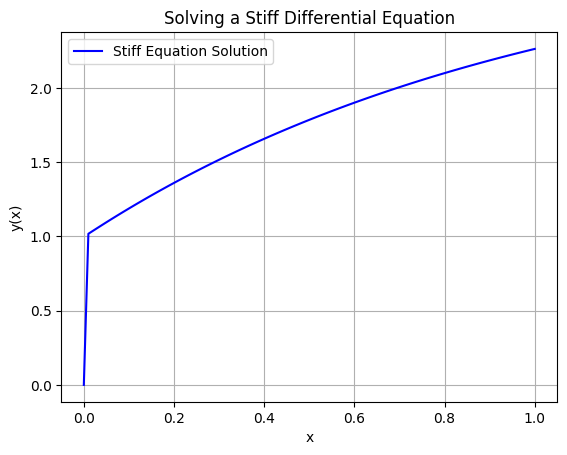

In [7]:
def stiff_eqn(x, y):
    return -1000 * y + 3000 - 2000 * np.exp(-x)

x_vals = np.linspace(0, 1, 100)
initial_y = [0]

# Solve using BDF (for stiff problems)
solution_stiff = solve_ivp(stiff_eqn, [0, 1], initial_y, t_eval=x_vals, method='BDF')

# Plotting the solution
plt.plot(solution_stiff.t, solution_stiff.y[0], label='Stiff Equation Solution', color='b')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solving a Stiff Differential Equation')
plt.legend()
plt.grid(True)
plt.show()

- **Stiff Equation**: The term \( -1000y \) causes rapid changes in the solution.
- **BDF Method**: Designed to handle such rapid changes without numerical instability.

**Insight**: For stiff problems, using a method like **BDF** ensures the solution doesn’t break down due to fast changes in the system.